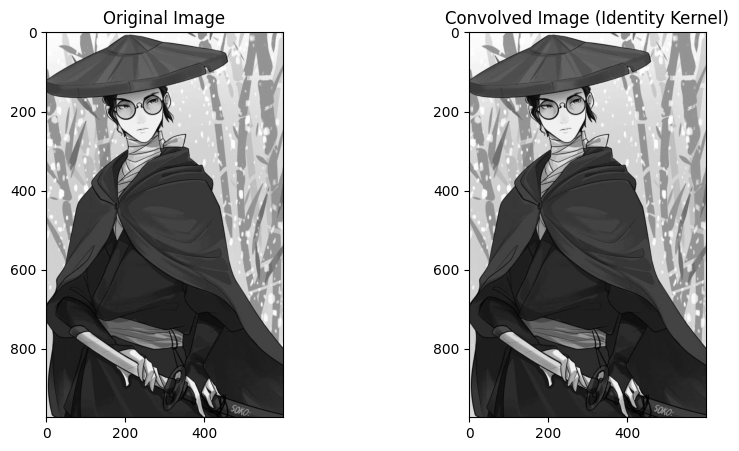

Observation: The output image is identical to the input image because the identity kernel preserves the original pixel values by only multiplying the central pixel by 1 and ignoring neighboring pixels.


In [74]:
#step 1 task 1

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/kaggle/input/d/saadbinsohan/463-l2/image1.jpg', 0)

kernel = np.array([[0, 0, 0],
                   [0, 1, 0],
                   [0, 0, 0]], dtype=np.float32)

convolved_image = cv2.filter2D(image, -1, kernel)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Convolved Image (Identity Kernel)")
plt.imshow(convolved_image, cmap='gray')
plt.show()

print("Observation: The output image is identical to the input image because the identity kernel preserves the original pixel values by only multiplying the central pixel by 1 and ignoring neighboring pixels.")

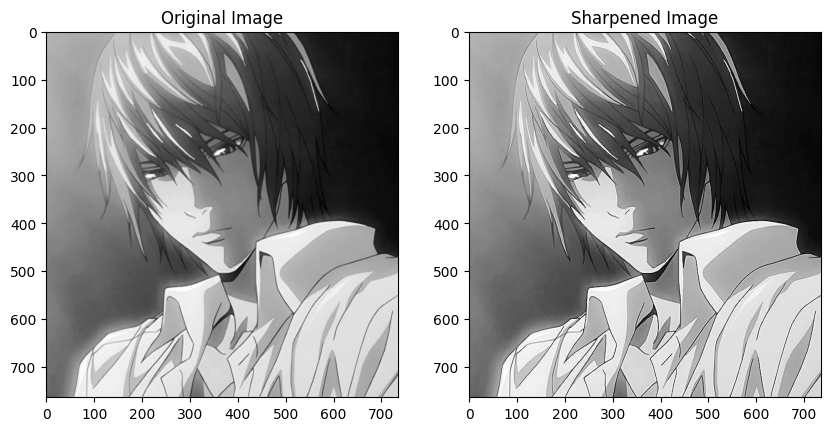

Observation: The sharpening kernel increases edges and fine details in the image by amplifying the central pixel while subtracting neighboring pixels. This enhances local contrast, making the image appear clearer and less blurred.


In [75]:
#s1 t2

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/kaggle/input/d/saadbinsohan/463-l2/image2.jpg', 0)

kernel = np.array([[ 0, -1,  0],
                   [-1,  5, -1],
                   [ 0, -1,  0]], dtype=np.float32)

sharpened_image = cv2.filter2D(image, -1, kernel)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Sharpened Image")
plt.imshow(sharpened_image, cmap='gray')
plt.show()

print("Observation: The sharpening kernel increases edges and fine details in the image by amplifying the central pixel while subtracting neighboring pixels. This enhances local contrast, making the image appear clearer and less blurred.")

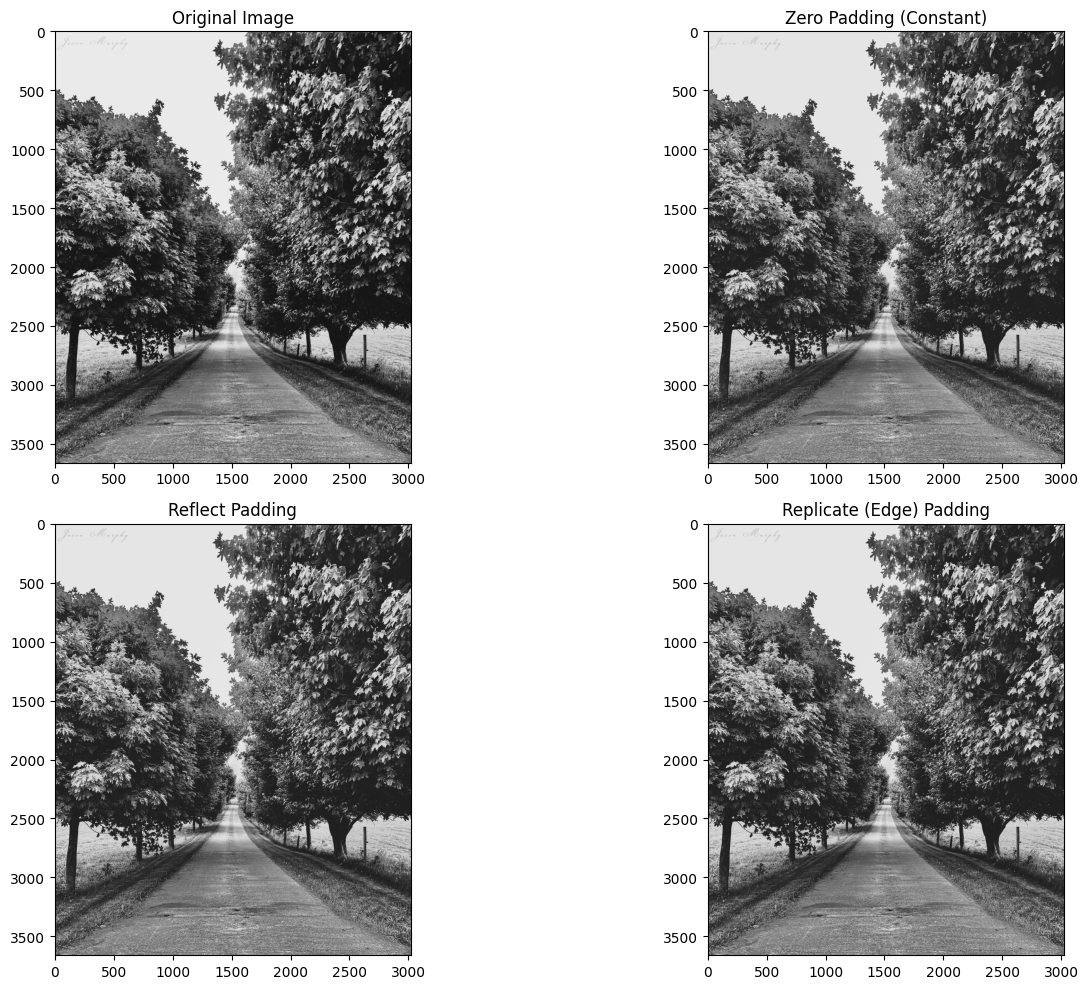

 Observations: 1. Zero Padding: Introduces dark borders around edges due to padded zeros. Sharpening is less natural at boundaries.
2. Reflect Padding: Mirrors edge pixels, avoiding artificial edges. Sharpening appears seamless.
3. Replicate Padding: Extends edge pixels, preserving sharpness at boundaries but may amplify edge artifacts.


In [76]:
#s2 t3

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/kaggle/input/d/saadbinsohan/463-l2/image3.jpg', 0)

kernel = np.array([[ 0, -1,  0],
                   [-1,  5, -1],
                   [ 0, -1,  0]], dtype=np.float32)


# 1. Zero-padding
constant_padded = cv2.filter2D(image, -1, kernel, borderType=cv2.BORDER_CONSTANT)

# 2. Reflect padding
reflect_padded = cv2.filter2D(image, -1, kernel, borderType=cv2.BORDER_REFLECT)

# 3. Replicate edge pixels
replicate_padded = cv2.filter2D(image, -1, kernel, borderType=cv2.BORDER_REPLICATE)

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.subplot(2, 2, 2)
plt.title("Zero Padding (Constant)")
plt.imshow(constant_padded, cmap='gray')
plt.subplot(2, 2, 3)
plt.title("Reflect Padding")
plt.imshow(reflect_padded, cmap='gray')
plt.subplot(2, 2, 4)
plt.title("Replicate (Edge) Padding")
plt.imshow(replicate_padded, cmap='gray')
plt.tight_layout() 
plt.show()

print(" Observations: 1. Zero Padding: Introduces dark borders around edges due to padded zeros. Sharpening is less natural at boundaries.\n2. Reflect Padding: Mirrors edge pixels, avoiding artificial edges. Sharpening appears seamless.\n3. Replicate Padding: Extends edge pixels, preserving sharpness at boundaries but may amplify edge artifacts.")

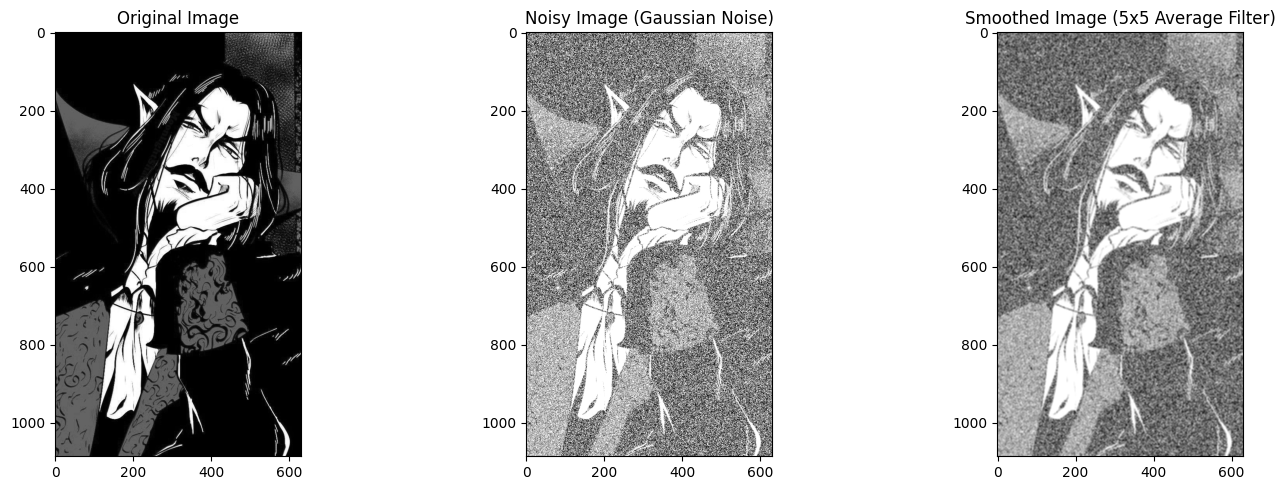

Observation: The 5x5 average filter reduces Gaussian noise by averaging pixel values in a local neighborhood, resulting in a smoother image. However, fine details are also slightly blurred.


In [77]:
#s3 t4

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/kaggle/input/d/saadbinsohan/463-l2/image4.jpg', 0)
noise = np.random.normal(0, 25, image.shape).astype(np.uint8)
noisy_image = cv2.add(image, noise)

smoothed_image = cv2.blur(noisy_image, (5, 5))

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.subplot(1, 3, 2)
plt.title("Noisy Image (Gaussian Noise)")
plt.imshow(noisy_image, cmap='gray')
plt.subplot(1, 3, 3)
plt.title("Smoothed Image (5x5 Average Filter)")
plt.imshow(smoothed_image, cmap='gray')
plt.tight_layout()
plt.show()

print("Observation: The 5x5 average filter reduces Gaussian noise by averaging pixel values in a local neighborhood, resulting in a smoother image. However, fine details are also slightly blurred.")

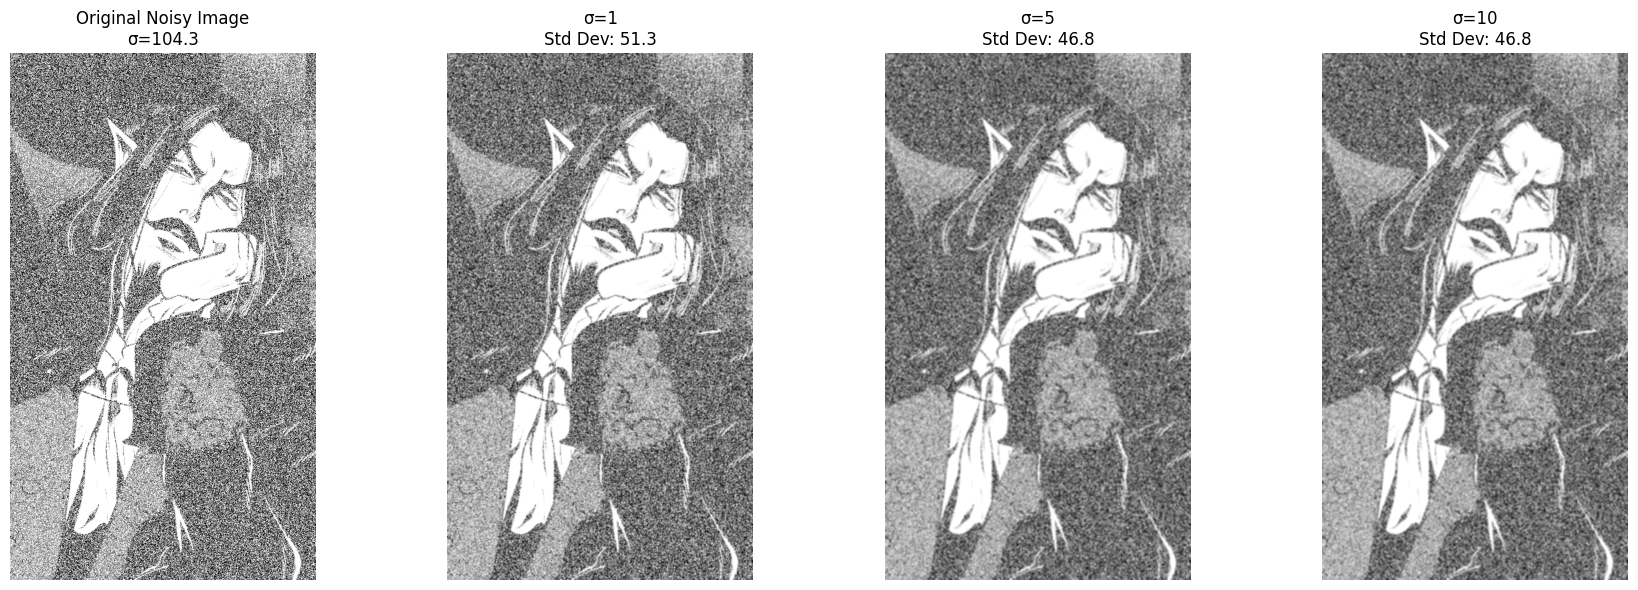

Standard Deviation Analysis:
- Original Noisy Image: 104.3
σ=1: 51.3 (50.8% noise reduction)
σ=5: 46.8 (55.1% noise reduction)
σ=10: 46.8 (55.2% noise reduction)
Observation: Larger sigma values increase spatial smoothing distance in the Gaussian kernel, resulting in stronger noise suppression but greater loss of fine details. The optimal sigma balances noise removal with detail preservation.


In [78]:
#s3 t5

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/kaggle/input/d/saadbinsohan/463-l2/image4.jpg', 0)
noise = np.random.normal(0, 25, image.shape).astype(np.uint8)
noisy_image = cv2.add(image, noise)

kernel_size = (5,5)
sigma_values = [1, 5, 10]

plt.figure(figsize=(18, 6))

plt.subplot(1, len(sigma_values)+1, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title(f"Original Noisy Image\nσ={noisy_image.std():.1f}")
plt.axis('off')

for i, sigma in enumerate(sigma_values, start=2):
    gaussian_blurred = cv2.GaussianBlur(noisy_image, kernel_size, sigmaX=sigma)
    
    current_std = gaussian_blurred.std()
    
    plt.subplot(1, len(sigma_values)+1, i)
    plt.imshow(gaussian_blurred, cmap='gray')
    plt.title(f"σ={sigma}\nStd Dev: {current_std:.1f}")
    plt.axis('off')

plt.tight_layout()
plt.show()

original_std = noisy_image.std()
print("Standard Deviation Analysis:")
print(f"- Original Noisy Image: {original_std:.1f}")
for sigma in sigma_values:
    blurred = cv2.GaussianBlur(noisy_image, kernel_size, sigma)
    reduction = (1 - (blurred.std()/original_std)) * 100
    print(f"σ={sigma}: {blurred.std():.1f} ({reduction:.1f}% noise reduction)")

print("Observation: Larger sigma values increase spatial smoothing distance in the Gaussian kernel, resulting in stronger noise suppression but greater loss of fine details. The optimal sigma balances noise removal with detail preservation.")

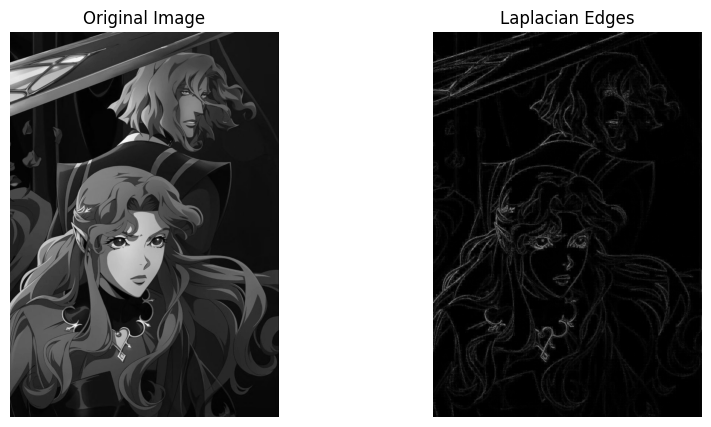

In [79]:
#s4 t6

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/kaggle/input/d/saadbinsohan/463-l2/image5.jpg', 0)

laplacian = cv2.Laplacian(image, cv2.CV_64F)
laplacian_abs = np.uint8(np.absolute(laplacian))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Laplacian Edges")
plt.imshow(laplacian_abs, cmap='gray')
plt.axis('off')
plt.show()

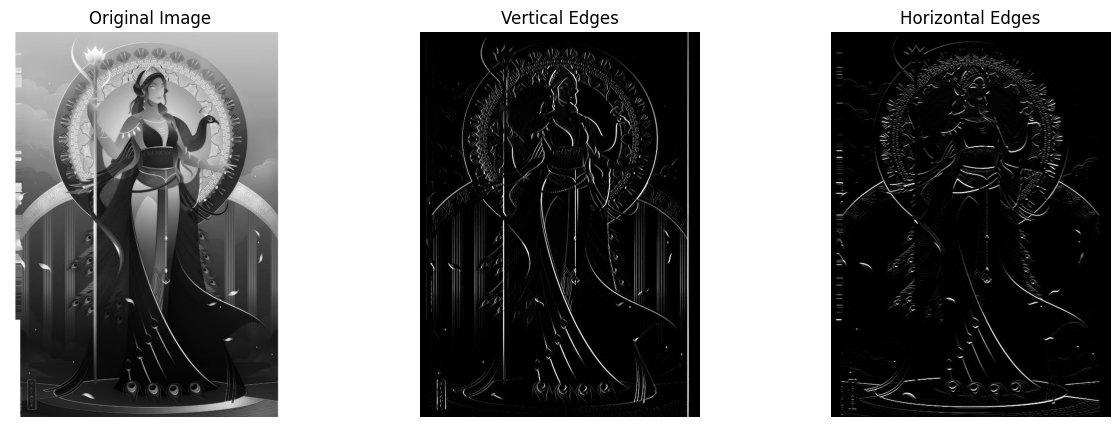

In [80]:
#s4 t7

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/kaggle/input/d/saadbinsohan/463-l2/image6.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

vertical_kernel = np.array([[-1, 0, 1],
                            [-1, 0, 1],
                            [-1, 0, 1]], dtype=np.float32)

horizontal_kernel = np.array([[-1, -1, -1],
                              [ 0,  0,  0],
                              [ 1,  1,  1]], dtype=np.float32)

vertical_edges = cv2.filter2D(gray, -1, vertical_kernel)
vertical_edges = cv2.convertScaleAbs(vertical_edges)

horizontal_edges = cv2.filter2D(gray, -1, horizontal_kernel)
horizontal_edges = cv2.convertScaleAbs(horizontal_edges)

plt.figure(figsize=(15, 5))

plt.subplot(131), plt.imshow(gray, cmap='gray')
plt.title('Original Image'), plt.axis('off')

plt.subplot(132), plt.imshow(vertical_edges, cmap='gray')
plt.title('Vertical Edges'), plt.axis('off')

plt.subplot(133), plt.imshow(horizontal_edges, cmap='gray')
plt.title('Horizontal Edges'), plt.axis('off')

plt.show()

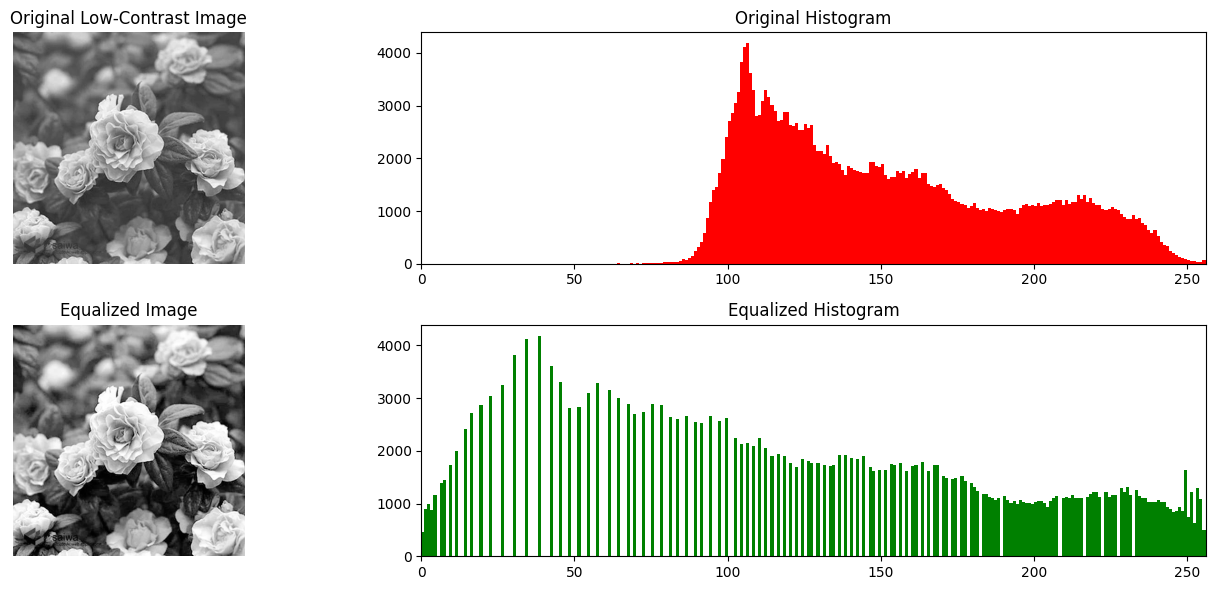

Observation: Histogram equalization redistributes pixel intensities to span the full dynamic range. The equalized histogram shows better intensity distribution, resulting in enhanced contrast and revealed image details.


In [81]:
#s5 t1

import cv2
import matplotlib.pyplot as plt
import numpy as np

img_path = '/kaggle/input/d/saadbinsohan/463-l2/image7.jpg'
low_contrast = cv2.imread(img_path, 0)

equalized = cv2.equalizeHist(low_contrast)

plt.figure(figsize=(15, 6))

plt.subplot(2, 2, 1)
plt.imshow(low_contrast, cmap='gray')
plt.title('Original Low-Contrast Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.hist(low_contrast.ravel(), 256, [0,256], color='r')
plt.title('Original Histogram')
plt.xlim([0,256])

plt.subplot(2, 2, 3)
plt.imshow(equalized, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.hist(equalized.ravel(), 256, [0,256], color='g')
plt.title('Equalized Histogram')
plt.xlim([0,256])

plt.tight_layout()
plt.show()

print("Observation: Histogram equalization redistributes pixel intensities to span the full dynamic range. The equalized histogram shows better intensity distribution, resulting in enhanced contrast and revealed image details.")

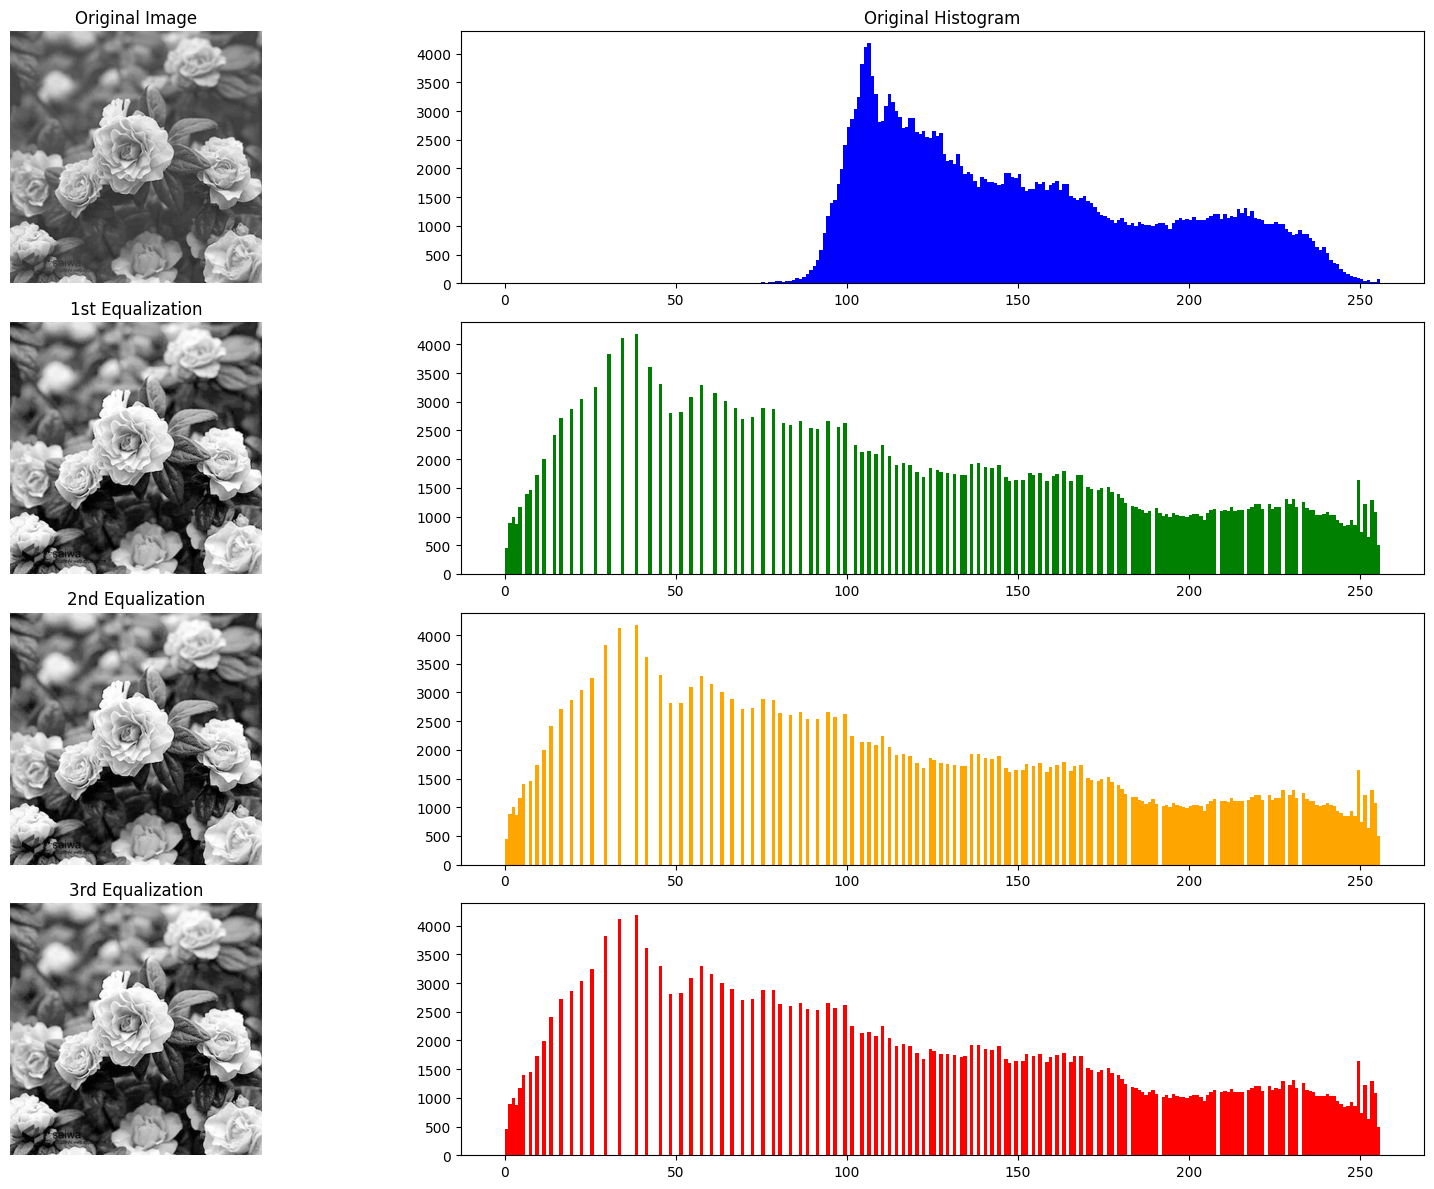

Observation: Repeated equalization shows diminishing returns after first application. The histogram becomes nearly uniform after initial equalization, causing subsequent applications to amplify noise and create artificial contrast in originally smooth regions.


In [82]:
#s5 t2

import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/kaggle/input/d/saadbinsohan/463-l2/image7.jpg', 0)

eq1 = cv2.equalizeHist(img)
eq2 = cv2.equalizeHist(eq1)
eq3 = cv2.equalizeHist(eq2)

plt.figure(figsize=(18, 12))

plt.subplot(4, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(4, 2, 2)
plt.hist(img.ravel(), 256, [0,256], color='blue')
plt.title('Original Histogram')

plt.subplot(4, 2, 3)
plt.imshow(eq1, cmap='gray')
plt.title('1st Equalization')
plt.axis('off')

plt.subplot(4, 2, 4)
plt.hist(eq1.ravel(), 256, [0,256], color='green')

plt.subplot(4, 2, 5)
plt.imshow(eq2, cmap='gray')
plt.title('2nd Equalization')
plt.axis('off')

plt.subplot(4, 2, 6)
plt.hist(eq2.ravel(), 256, [0,256], color='orange')

plt.subplot(4, 2, 7)
plt.imshow(eq3, cmap='gray')
plt.title('3rd Equalization')
plt.axis('off')

plt.subplot(4, 2, 8)
plt.hist(eq3.ravel(), 256, [0,256], color='red')

plt.tight_layout()
plt.show()

print("Observation: Repeated equalization shows diminishing returns after first application. The histogram becomes nearly uniform after initial equalization, causing subsequent applications to amplify noise and create artificial contrast in originally smooth regions.")